### Probability Theory ###

Probability theory is a branch of mathematics that deals with the study of randomness, uncertainty, and the likelihood of different outcomes. It provides a framework to quantify and model uncertain events, allowing us to make predictions and analyze situations involving randomness.

**Tossing a Coin**

If we flip a coin, the sample space is S={Heads,Tails}. If the coin is fair, each outcome has a probability of 0.5: 


𝑃(Heads)=1/2,

𝑃(Tails)=1/2

In [4]:
import random

In [8]:
def coin_toss():
    return "Heads" if random.random() < 0.5 else "Tails"

results = {"Heads":0,"Tails":0}
for _ in range(1000):           #Simulating 1000 tosses and calculating probabilities
    result = coin_toss()
    results[result] += 1

prob_heads = results["Heads"]/1000    #Empirical probabilities
prob_tails = results["Tails"]/1000

print(f"Probability of Heads: {prob_heads}")
print(f"Probability of Tails: {prob_tails}")

Probability of Heads: 0.522
Probability of Tails: 0.478


### Compound Probability ###

It refers to the probability of two or more events occurring together or in sequence. These events can either be independent (unrelated) or dependent (the outcome of one affects the outcome of the other). Compound probability helps us determine the likelihood of multiple events happening together.

**Independent Events** : Two events are independent when the outcome of one event does not affect the outcome of the other.

**Dependent Events** : Dependent events occur when the outcome of one event affects the outcome of another event.

### Counting in Probability ###


**Permutations:** When the order of selection matters.


**Combinations:** When the order of selection doesn’t matter.

In [14]:
from math import factorial

In [16]:
def permutations(n,r):
    return factorial(n)//factorial(n-r) #Function to calculate permutation P(n,r)

# Arrange 3 people from a group of 5
n=5
r=3
result = permutations(n,r)
print(f"Number of ways to arrange {r} people from {n}: {result}")

Number of ways to arrange 3 people from 5: 60


In [20]:
def combinations(n,r):
    return factorial(n)//(factorial(r)*factorial(n-r))

# Select 3 people from a group of 5
n=5  
r=3  
result = combinations(n, r)
print(f"Number of ways to select {r} people from {n}: {result}")

Number of ways to select 3 people from 5: 10


### Conditional Probability ###

Conditional probability is the probability of an event occurring given that another event has already occurred. It is written as P(A∣B), which reads as "the probability of event A occurring given that event B has occurred."

### Probability Distributions ###

A probability distribution describes how the values of a random variable are distributed.

**Discrete Probability Distributions** : A discrete probability distribution is one in which the random variable can take on a finite or countable number of distinct values. 

**Setting up a dice roll and plot the distribution**

In [27]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division
%matplotlib inline

Text(0.5, 1.0, 'Probability mass function for dice roll')

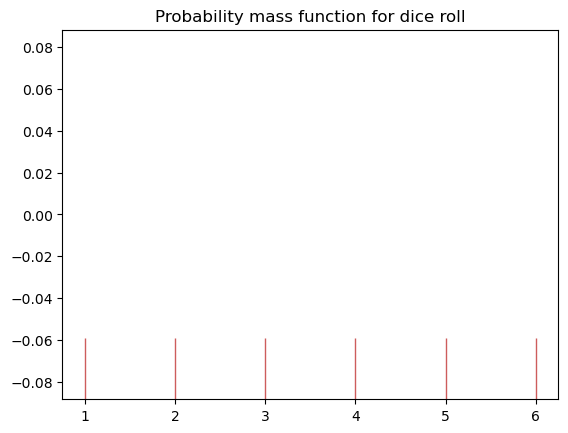

In [31]:
roll_options = [1,2,3,4,5,6] #Each numbers

tprob = 1 #Total probability space

prob_roll = tprob / len(roll_options) 

uni_plot = sns.rugplot(roll_options,height=prob_roll,c="indianred")
uni_plot.set_title("Probability mass function for dice roll")

Automatically creating Discrete Uniform Distribution by using Scipy

In [35]:
from scipy.stats import randint

In [37]:
low,high = 1,7
mean,var = randint.stats(low,high)
print("Mean is ",mean)

Mean is  3.5


<BarContainer object of 6 artists>

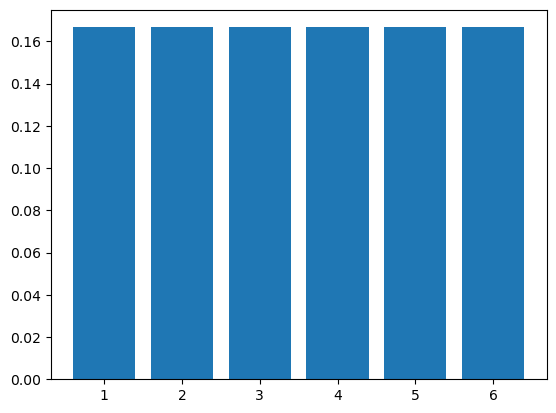

In [39]:
plt.bar(roll_options,randint.pmf(roll_options,low,high))

### Examples of Discrete Distributions: ###

**Binomial Distribution:** The probability of having exactly k successes in n independent Bernoulli trials.


**Poisson Distribution:** The probability of a number of events happening in a fixed interval of time or space, given the average number of times the event occurs.

Example: two players are playing basketball, player A and B. Player A takes an average of 11 shots per game, has an average success rate 72%. Player B takes an average of 15 shots per game, has an average success rate 48%.

What is the probability that player A makes 6 shots in an average game?

In [51]:
p_A = .72 #probability of succes for A
n_A = 11 #number of A

k=6 #make 6 shots

import scipy.special as sc #for combination
comb_A = sc.comb(n_A,k)

answer = comb_A*(p_A**k)*((1-p_A)**(n_A-k))
answer = 100*answer
print(answer)

11.07712638528535


**Continuous Probability Distributions** : A continuous probability distribution applies to continuous random variables, which can take any value within a range. Since the range is infinite, the probability of the variable taking any specific value is 0.

continuous distributions like the normal distribution can help model phenomena like heights, weights, and other measurements that can take on any value within a range. 

**Normal Distribution**

The normal distribution is a continuous probability distribution characterized by its symmetric bell-shaped curve. It is defined by two parameters: the mean (average) and the standard deviation (measure of spread).


Example: test Scores

Let's consider a scenario where a standardized test's scores are normally distributed with a mean score of 70 and a standard deviation of 10. We want to find:

The probability that a randomly selected student scores above 85.

In [55]:
from scipy.stats import norm

In [61]:
mean = 70    # Mean of the test scores
std_dev = 10 # Standard deviation of the test scores

prob_above_85 = 1 - norm.cdf(85, mean, std_dev)
print(f"Probability of scoring above 85: {prob_above_85:.4f}")

# To find the probability of scoring above 85, we use the cumulative distribution function (CDF) and subtract it from 1

Probability of scoring above 85: 0.0668


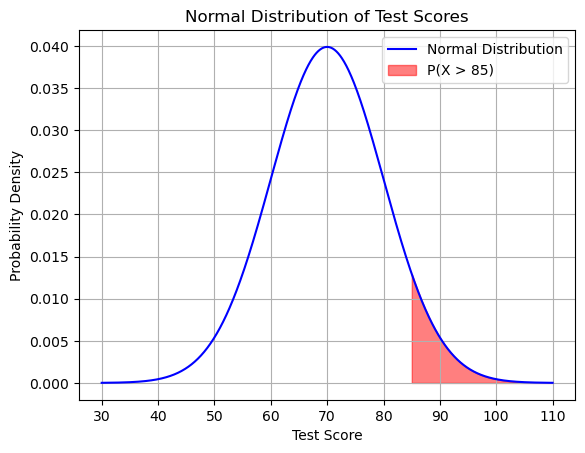

In [65]:
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000) #np.linspace(start, stop, num): This function generates num evenly spaced values between start and stop.
pdf = norm.pdf(x, mean, std_dev)

plt.plot(x, pdf, label='Normal Distribution', color='blue')
plt.fill_between(x, 0, pdf, where=(x > 85), color='red', alpha=0.5, label="P(X > 85)")

plt.title("Normal Distribution of Test Scores")
plt.xlabel("Test Score")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()